In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm as tqdm

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои.
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
losses_t = []
losses_v = []

In [ ]:
def train_valid(model, epoch, optimizer, train_loader, valid_loader, device, criterion):
  model.train()

  train_losses=[]
  train_list_process=[]

  valid_losses=[]
  valid_list_process=[]

  train_loss = 0
  train_correct = 0

  valid_loss = 0
  valid_correct = 0

  for data, label in train_loader:
    data, label = data.to(device), label.to(device)
    optimizer.zero_grad()
    output = model(data.view(data.size(0), -1))
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    pred = output.argmax(dim=1, keepdim=True)
    train_correct += pred.eq(label.view_as(pred)).sum().item()

  model.eval()

  with torch.no_grad():
    for data, label in valid_loader:
      data, label = data.to(device), label.to(device)
      output = model(data.view(data.size(0), -1))
      valid_loss += criterion(output, label).item()
      pred = output.argmax(dim=1, keepdim=True)
      valid_correct += pred.eq(label.view_as(pred)).sum().item()

  print('epoch for train: {}, accuracy: ({:.2f}%)'.format(epoch+1,train_correct*100 / len(train_loader.dataset)))
  train_list_process.append(train_correct*100 / len(train_loader.dataset))
  losses_t.append(train_loss / len(train_loader))

  print('epoch for valid: {}, accuracy: ({:.2f}%)'.format(epoch+1,valid_correct*100 / len(valid_loader.dataset)))
  print('')
  losses_v.append(valid_loss / len(valid_loader))

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

valid_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17193097.99it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303908.21it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5575393.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16895365.41it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

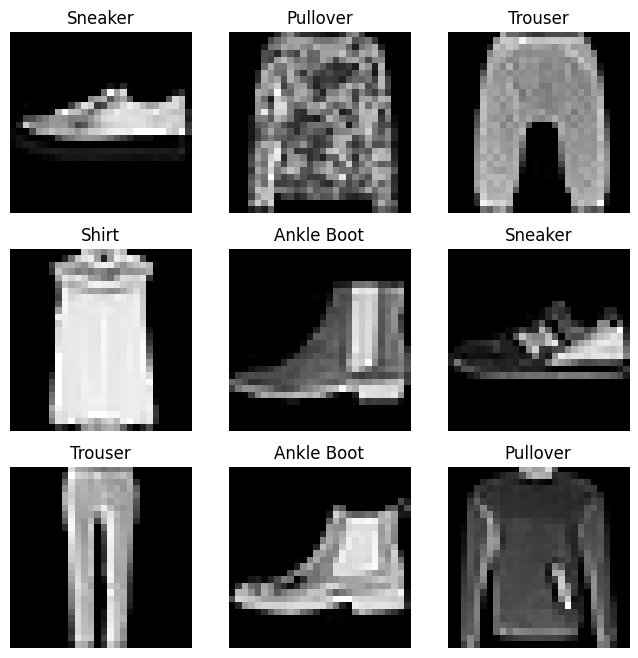

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
batch_size_train = 1000
batch_size_valid = 1000
learning_rate = 0.001

In [ ]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size = batch_size_train, shuffle = True)

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size_valid, shuffle = True)

In [ ]:
num_classes = 10
input_size = 1*28*28
hidden_size = 1024
num_epochs = 10
device = 'cpu'

In [ ]:
losses_v = []
losses_t = []

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, num_classes),
    nn.Tanh()
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch for train: 1, accuracy: (59.21%)
epoch for valid: 1, accuracy: (69.20%)

epoch for train: 2, accuracy: (76.19%)
epoch for valid: 2, accuracy: (79.19%)

epoch for train: 3, accuracy: (83.40%)
epoch for valid: 3, accuracy: (83.43%)

epoch for train: 4, accuracy: (85.64%)
epoch for valid: 4, accuracy: (84.93%)

epoch for train: 5, accuracy: (86.43%)
epoch for valid: 5, accuracy: (84.95%)

epoch for train: 6, accuracy: (86.79%)
epoch for valid: 6, accuracy: (85.76%)

epoch for train: 7, accuracy: (87.09%)
epoch for valid: 7, accuracy: (85.79%)

epoch for train: 8, accuracy: (87.59%)
epoch for valid: 8, accuracy: (85.72%)

epoch for train: 9, accuracy: (87.90%)
epoch for valid: 9, accuracy: (86.03%)

epoch for train: 10, accuracy: (88.35%)
epoch for valid: 10, accuracy: (86.07%)



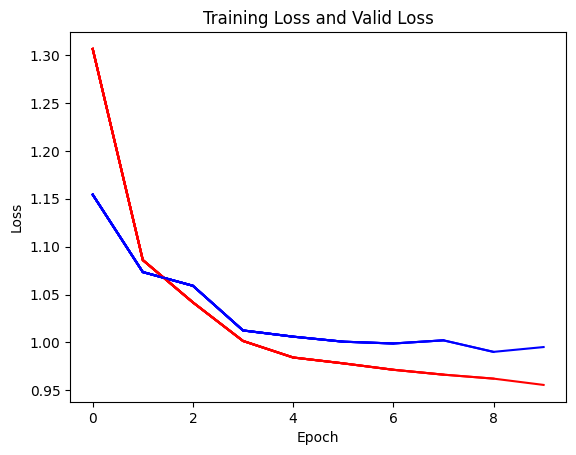

In [ ]:
for epoch in range(10):
  train_valid(model, epoch, optimizer, train_loader, valid_loader, device, criterion)

  plt.plot(losses_t, color = 'red', label = 'Train')
  plt.plot(losses_v, color = 'blue', label = 'Valid')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss and Valid Loss')

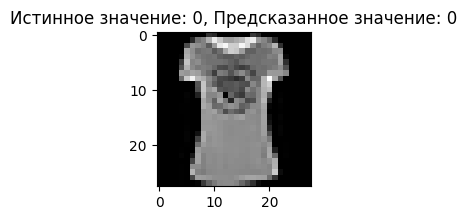

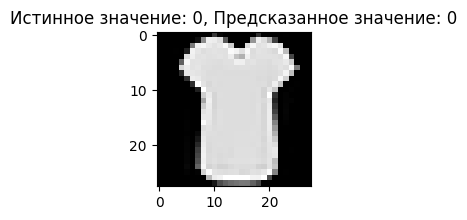

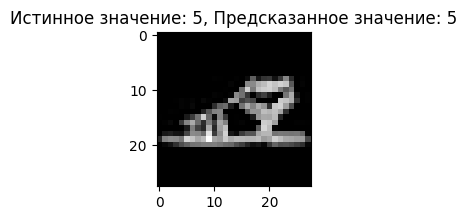

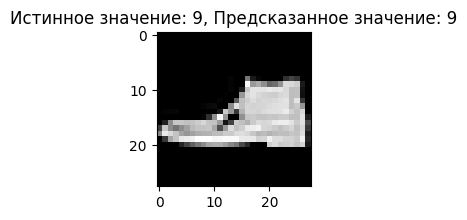

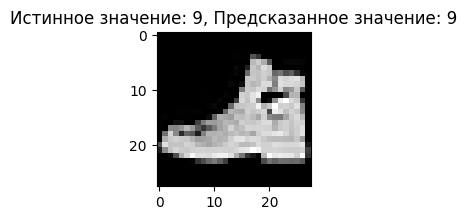

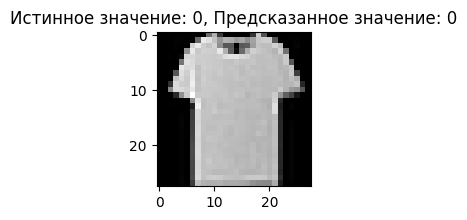

In [ ]:
with torch.no_grad():
    for inputs, targets in valid_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.reshape(-1, 28*28).to(device)

        outputs = model(inputs)

        _, predictions_indices = torch.max(outputs, 1)

        for i, (inpt, trgt, pred) in enumerate(zip(inputs, targets, predictions_indices)):
            _, ax = plt.subplots(figsize=(2,2))
            ax.set_title(f"Истинное значение: {trgt}, Предсказанное значение: {pred}")
            ax.imshow(inpt.view(28, 28), cmap='gray', interpolation='none')

            if i==5:
                break
        break

In [ ]:
def show_matrix():
    model.eval()
    true = torch.empty(0)
    predict = torch.empty(0)

    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.reshape(-1, 28*28).to(device)

            outputs = model(inputs)

            _, predictions_indices = torch.max(outputs, 1)

            true = torch.cat((true, targets))
            predict = torch.cat((predict, predictions_indices))

    plt.figure(figsize=(14,12))
    sns.heatmap(
        pd.DataFrame(
            confusion_matrix(true.numpy().astype("int"), predict.numpy().astype("int")),
        ),
        annot=True,
        fmt="d"
    );

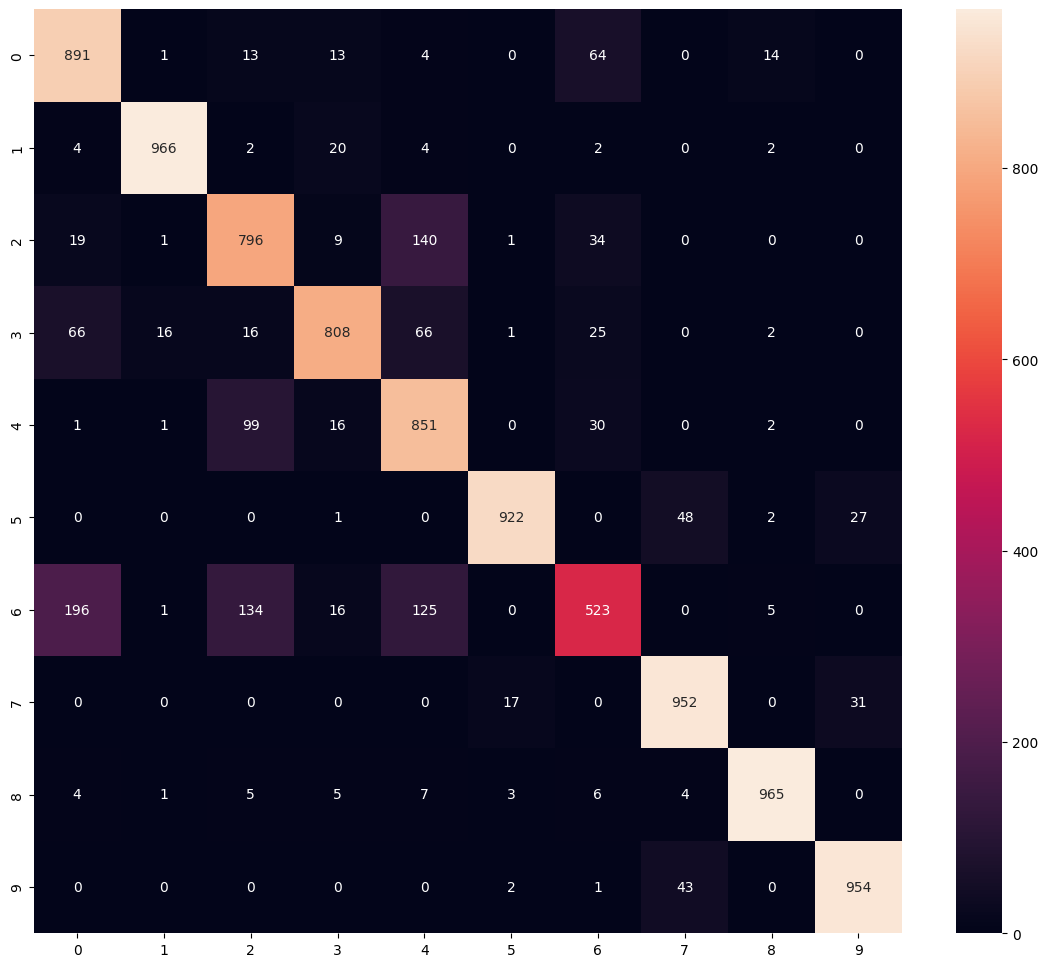

In [ ]:
show_matrix()

In [ ]:
train_valid(model, epoch, optimizer, train_loader, valid_loader, device, criterion)

epoch for train: 10, accuracy: (88.75%)
epoch for valid: 10, accuracy: (87.02%)



### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть.
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
losses_train = []
losses_valid = []

In [ ]:
def train(model, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for data, label in train_loader:
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        #get argmax values in outputs
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for train: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(train_loader.dataset)))
    losses_train.append(train_loss / len(train_loader))

In [ ]:
def valid(model, epoch):
    model.eval()
    valid_loss = 0
    correct = 0
    with torch.no_grad():
        for data, label in valid_loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            valid_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for test: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(valid_loader.dataset)))
    losses_valid.append(valid_loss / len(valid_loader))

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

valid_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10647972.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201719.55it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3773608.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5824730.78it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = 64, shuffle=True)
train_loader = torch.utils.data.DataLoader(training_data, batch_size = 64, shuffle = True)

In [ ]:
device = 'cpu'

In [ ]:
class cnn_layers(nn.Module):
    def __init__(self):
        super(cnn_layers,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.tanh(x)
        x = self.conv2(x)
        x = F.tanh(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = cnn_layers()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.NLLLoss()

In [ ]:
print(model)
for epoch in tqdm(range(10)):
    train(model, epoch)
    valid(model, epoch)

cnn_layers(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch for train: 0, accuracy: (88.34%)
epoch for test: 0, accuracy: (87.99%)
epoch for train: 1, accuracy: (89.38%)
epoch for test: 1, accuracy: (88.82%)
epoch for train: 2, accuracy: (90.32%)
epoch for test: 2, accuracy: (89.12%)
epoch for train: 3, accuracy: (91.11%)
epoch for test: 3, accuracy: (89.93%)
epoch for train: 4, accuracy: (91.71%)
epoch for test: 4, accuracy: (89.83%)
epoch for train: 5, accuracy: (92.55%)
epoch for test: 5, accuracy: (90.42%)
epoch for train: 6, accuracy: (93.00%)
epoch for test: 6, accuracy: (90.56%)
epoch for train: 7, accuracy: (93.53%)
epoch for test: 7, accuracy: (90.84%)
epoch for train: 8, accuracy: (94.12%)
epoch for test: 8, accuracy: (90.77%)
epoch for train: 9, accuracy: (94.57%)
epoch for test: 9, accuracy: (90.93%)


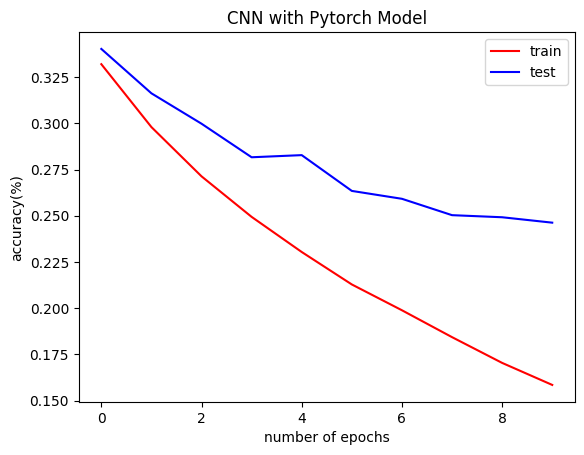

In [ ]:
plt.plot(losses_train, color = 'red', label = 'train')
plt.plot(losses_valid, color = 'blue', label = 'test')
plt.xlabel("number of epochs")
plt.ylabel("accuracy(%)")
plt.title("CNN with Pytorch Model")
plt.legend()
plt.show()

##  2. Классификация изображений (датасет CIFAR 10)


### 2.1 Решить задачу классификации, не используя сверточные слои.

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
losses_train = []
losses_valid = []

In [ ]:
def train(model, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for data, label in train_loader_cifar:
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data.view(data.size(0), -1))
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        #get argmax values in outputs
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for train: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(train_loader_cifar.dataset)))
    losses_train.append(correct*100 / len(train_loader_cifar.dataset))

def valid(model, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, label in test_loader_cifar:
            data, label = data.to(device), label.to(device)
            output = model(data.view(data.size(0), -1))
            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for test: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(test_loader_cifar.dataset)))
    losses_valid.append(correct*100 / len(test_loader_cifar.dataset))

In [ ]:
training_data_cifar = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)) # Нормализация
                             ]))

test_data_cifar = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)) # Нормализация
                             ]))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
training_data_cifar.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Параметры модели:
batch_size_train = 64
batch_size_test = 64
learning_rate = 0.001

In [ ]:
train_loader_cifar = torch.utils.data.DataLoader(training_data_cifar, batch_size = batch_size_train, shuffle = True)

test_loader_cifar = torch.utils.data.DataLoader(test_data_cifar, batch_size = batch_size_test, shuffle = True)

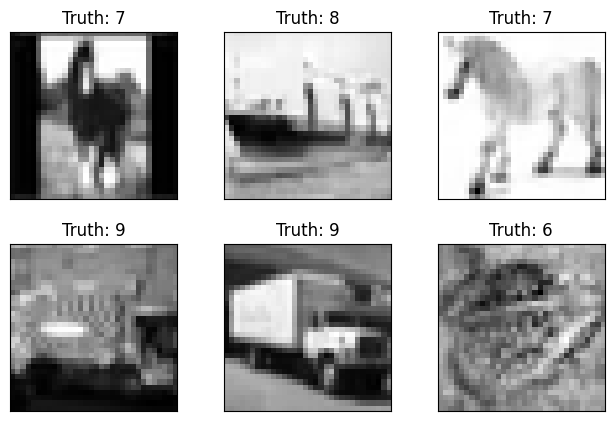

In [ ]:
examples = enumerate(test_loader_cifar)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
num_classes = 10 # Количество классов заранее известно
input_size = 32 * 32 * 3 # Размерность изображений
hidden_size = 256 # Количество нейронов на скрытом слое
num_epochs = 20 # Количество эпох
learning_rate = 0.0001 # Скорость обучения
device = 'cpu'

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epoch = 20

In [ ]:
for epoch in range(num_epochs):
    train(model, epoch)
    valid(model, epoch)

epoch for train: 0, accuracy: (35.97%)
epoch for test: 0, accuracy: (41.73%)
epoch for train: 1, accuracy: (43.48%)
epoch for test: 1, accuracy: (44.23%)
epoch for train: 2, accuracy: (46.15%)
epoch for test: 2, accuracy: (45.07%)
epoch for train: 3, accuracy: (48.06%)
epoch for test: 3, accuracy: (45.38%)
epoch for train: 4, accuracy: (49.72%)
epoch for test: 4, accuracy: (48.42%)
epoch for train: 5, accuracy: (51.37%)
epoch for test: 5, accuracy: (48.64%)
epoch for train: 6, accuracy: (52.31%)
epoch for test: 6, accuracy: (48.61%)
epoch for train: 7, accuracy: (53.51%)
epoch for test: 7, accuracy: (49.47%)
epoch for train: 8, accuracy: (54.59%)
epoch for test: 8, accuracy: (50.40%)
epoch for train: 9, accuracy: (55.45%)
epoch for test: 9, accuracy: (50.90%)
epoch for train: 10, accuracy: (56.40%)
epoch for test: 10, accuracy: (51.25%)
epoch for train: 11, accuracy: (56.92%)
epoch for test: 11, accuracy: (51.82%)
epoch for train: 12, accuracy: (57.95%)
epoch for test: 12, accuracy: (5

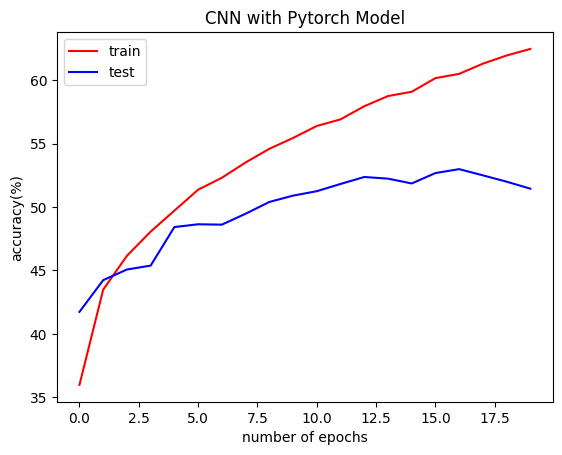

In [ ]:
plt.plot(losses_train, color = 'red', label = 'train')
plt.plot(losses_valid, color = 'blue', label = 'test')
plt.xlabel("number of epochs")
plt.ylabel("accuracy(%)")
plt.title("CNN with Pytorch Model")
plt.legend()
plt.show()

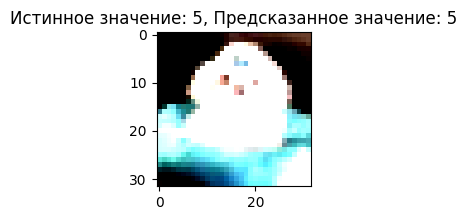

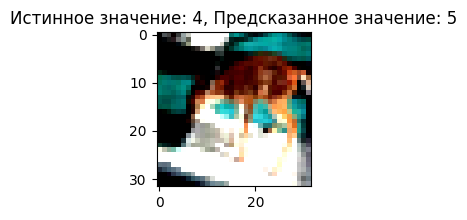

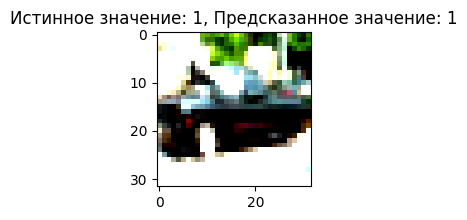

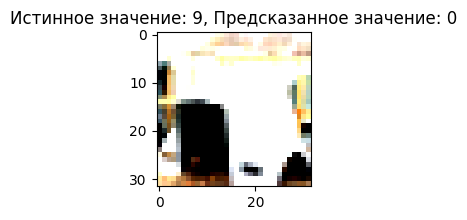

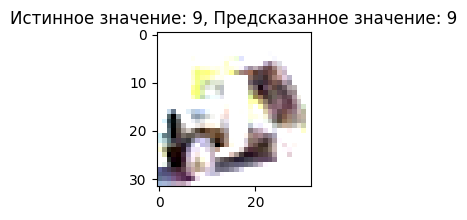

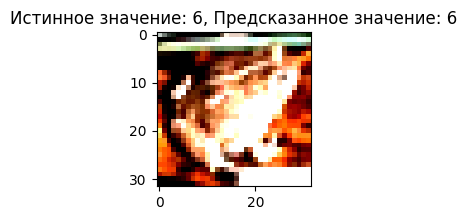

In [ ]:
with torch.no_grad():
    for inputs, targets in test_loader_cifar:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.reshape(-1, 32*32*3).to(device)

        outputs = model(inputs)

        _, predictions_indices = torch.max(outputs, 1)

        for i, (inpt, trgt, pred) in enumerate(zip(inputs, targets, predictions_indices)):
            inpt = inpt.view(3, 32, 32).cpu()
            _, ax = plt.subplots(figsize=(2,2))
            ax.set_title(f"Истинное значение: {trgt}, Предсказанное значение: {pred}")
            ax.imshow(inpt.permute(1, 2, 0).clamp(0, 1), cmap='gray', interpolation='none')

            if i==5:
                break
        break

In [ ]:
def show_matrix():
    model.eval()
    true = torch.empty(0)
    predict = torch.empty(0)

    with torch.no_grad():
        for inputs, targets in test_loader_cifar:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.reshape(-1, 32*32*3).to(device)

            outputs = model(inputs)

            _, predictions_indices = torch.max(outputs, 1)

            true = torch.cat((true, targets))
            predict = torch.cat((predict, predictions_indices))

    plt.figure(figsize=(14,12))
    sns.heatmap(
        pd.DataFrame(
            confusion_matrix(true.numpy().astype("int"), predict.numpy().astype("int")),
        ),
        annot=True,
        fmt="d"
    );

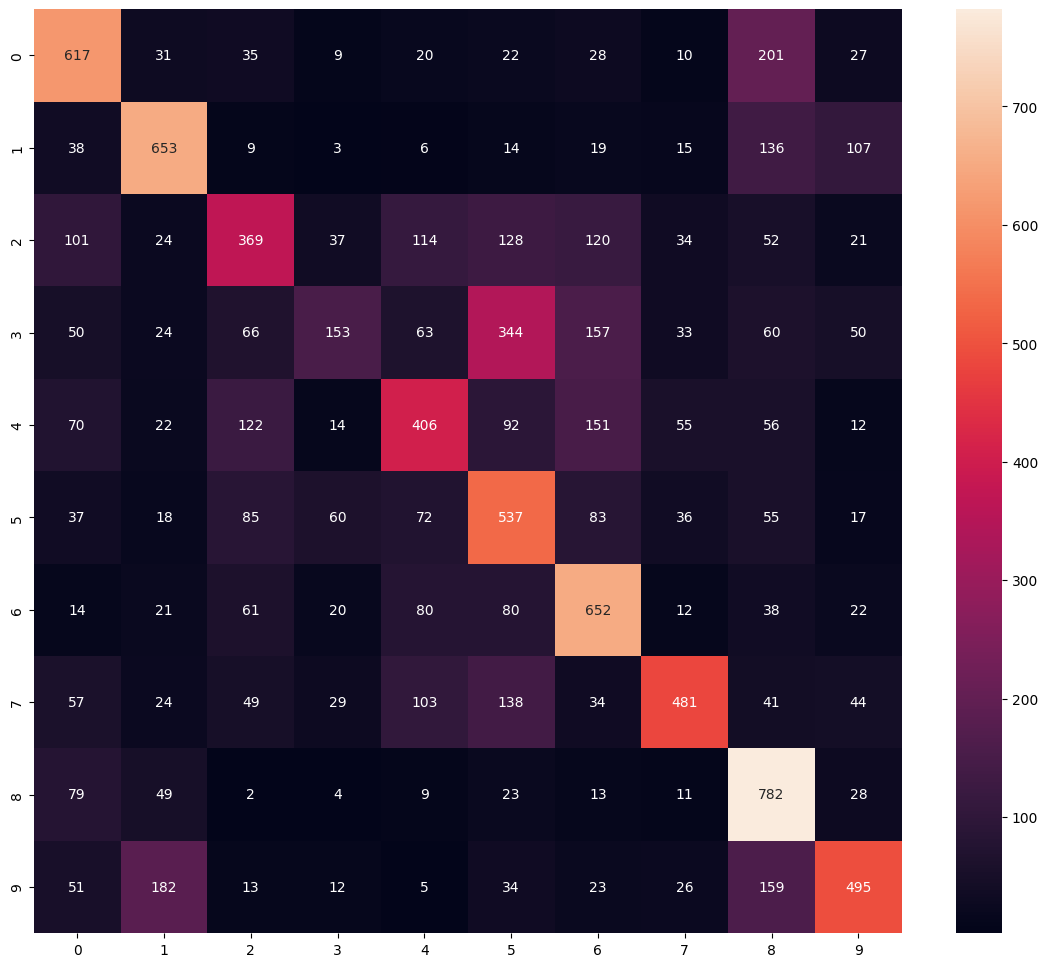

In [ ]:
show_matrix()

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть.
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
losses_train = []
losses_valid = []

In [ ]:
def train(model, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for data, label in train_loader_cifar:
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        #get argmax values in outputs
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for train: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(train_loader_cifar.dataset)))
    losses_train.append(correct*100 / len(train_loader_cifar.dataset))

def valid(model, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, label in test_loader_cifar:
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for test: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(test_loader_cifar.dataset)))
    losses_valid.append(correct*100 / len(test_loader_cifar.dataset))

In [ ]:
train_loader_cifar = torch.utils.data.DataLoader(training_data_cifar, batch_size = 64, shuffle = True)

test_loader_cifar = torch.utils.data.DataLoader(test_data_cifar, batch_size = 1000, shuffle = True)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(32 * 8 * 8, 1024),
    nn.Tanh(),
    nn.Linear(1024, 10),
).to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [ ]:
print(model)
for epoch in tqdm(range(20)):
    train(model, epoch)
    valid(model, epoch)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=2048, out_features=1024, bias=True)
  (8): Tanh()
  (9): Linear(in_features=1024, out_features=10, bias=True)
)


  0%|          | 0/20 [00:00<?, ?it/s]

epoch for train: 0, accuracy: (44.24%)
epoch for test: 0, accuracy: (51.02%)
epoch for train: 1, accuracy: (54.70%)
epoch for test: 1, accuracy: (57.35%)
epoch for train: 2, accuracy: (58.90%)
epoch for test: 2, accuracy: (59.60%)
epoch for train: 3, accuracy: (61.43%)
epoch for test: 3, accuracy: (60.74%)
epoch for train: 4, accuracy: (63.52%)
epoch for test: 4, accuracy: (61.60%)
epoch for train: 5, accuracy: (65.33%)
epoch for test: 5, accuracy: (62.68%)
epoch for train: 6, accuracy: (66.56%)
epoch for test: 6, accuracy: (63.91%)
epoch for train: 7, accuracy: (67.31%)
epoch for test: 7, accuracy: (64.07%)
epoch for train: 8, accuracy: (68.33%)
epoch for test: 8, accuracy: (64.37%)
epoch for train: 9, accuracy: (69.37%)
epoch for test: 9, accuracy: (64.90%)
epoch for train: 10, accuracy: (69.90%)
epoch for test: 10, accuracy: (65.63%)


KeyboardInterrupt: ignored

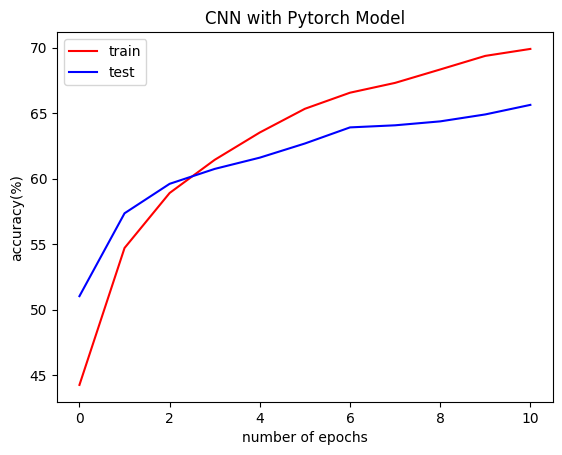

In [ ]:
plt.plot(losses_train, color = 'red', label = 'train')
plt.plot(losses_valid, color = 'blue', label = 'test')
plt.xlabel("number of epochs")
plt.ylabel("accuracy(%)")
plt.title("CNN with Pytorch Model")
plt.legend()
plt.show()

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 1371/1371 [00:15<00:00, 88.61it/s] 


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device} device')

Using cuda device


In [ ]:
def train(model, device, train_loader, optimizer, criterion, reshape = None):
    model.train() # Одна эпоха (шаг обучения)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    losses = []

    total_samples = 0
    correct_samples = 0
    train_loss = 0

    for (inputs, targets) in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        if reshape is not None:
            inputs = inputs.reshape(*reshape).to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets.squeeze())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += criterion(outputs, targets).item()
        losses.append(train_loss)

        total_samples += targets.shape[0]

        _, prediction_indices = torch.max(outputs, 1)
        correct_samples += torch.sum(prediction_indices==targets)

    train_accuracy = float(correct_samples) / total_samples
    print(f"epoch {epoch+1}: Loss: {torch.tensor(losses).mean():.4f}, Train_acc: {train_accuracy:.4f}")

    return torch.tensor(losses).mean(), train_accuracy

In [ ]:
def test(model, device, test_loader, reshape = None):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    losses = []

    total_samples = 0
    correct_samples = 0
    test_loss = 0

    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            if reshape is not None:
                inputs = inputs.reshape(*reshape).to(device)

            outputs = model(inputs)

            test_loss += criterion(outputs, targets).item()
            losses.append(test_loss)

            total_samples += targets.shape[0]
            _, predictions_indices = torch.max(outputs, 1)
            correct_samples += torch.sum(predictions_indices==targets)


    test_accuracy = correct_samples / total_samples
    test_loss /= len(test_loader.dataset)

    print(f"epoch {epoch+1}: Loss: {torch.tensor(losses).mean():.4f}, Test_acc: {test_accuracy:.4f}")

    return torch.tensor(losses).mean(), test_accuracy

In [ ]:
from torchvision.datasets import ImageFolder

training_data = ImageFolder(
    './training/training',
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            #transforms.RandomRotation((-20, 20)),
            transforms.RandomHorizontalFlip(),
            transforms.Resize((128, 128), antialias=True),
            transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),

        ]
    )
)

test_data = ImageFolder(
    './validation/validation',
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((128, 128), antialias=True),
            transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        ]
    )
)


In [ ]:
batch_size = 256

In [ ]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)

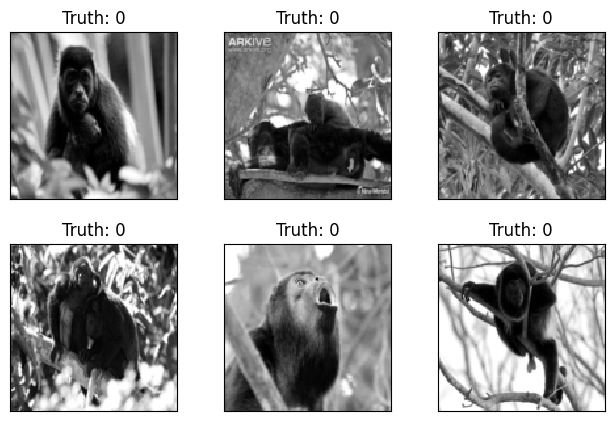

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
num_classes = 10
num_epochs = 15
learning_rate = 0.001

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(16),
    nn.LeakyReLU(negative_slope=0.01, inplace=True),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(32),
    nn.LeakyReLU(negative_slope=0.01, inplace=True),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(negative_slope=0.01, inplace=True),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(64 * 16 * 16, num_classes),
).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_losses = []
test_losses = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    test_loss, test_accuracy = test(model, device, test_loader)
    test_losses.append(test_loss)

epoch 1: Loss: 21.3712, Train_acc: 0.1623
epoch 1: Loss: 3.5041, Test_acc: 0.1250
epoch 2: Loss: 17.9340, Train_acc: 0.2188
epoch 2: Loss: 4.4561, Test_acc: 0.2794
epoch 3: Loss: 14.7520, Train_acc: 0.3537
epoch 3: Loss: 4.1724, Test_acc: 0.3051
epoch 4: Loss: 9.4401, Train_acc: 0.4002
epoch 4: Loss: 6.3910, Test_acc: 0.3640
epoch 5: Loss: 7.4636, Train_acc: 0.4248
epoch 5: Loss: 5.2318, Test_acc: 0.4412
epoch 6: Loss: 5.1934, Train_acc: 0.5114
epoch 6: Loss: 2.5363, Test_acc: 0.4449
epoch 7: Loss: 4.1140, Train_acc: 0.5579
epoch 7: Loss: 4.2483, Test_acc: 0.4890
epoch 8: Loss: 3.9204, Train_acc: 0.5880
epoch 8: Loss: 2.4697, Test_acc: 0.5000
epoch 9: Loss: 3.5422, Train_acc: 0.5953
epoch 9: Loss: 2.9482, Test_acc: 0.5331
epoch 10: Loss: 3.1285, Train_acc: 0.6645
epoch 10: Loss: 1.8013, Test_acc: 0.5846
epoch 11: Loss: 2.8038, Train_acc: 0.6828
epoch 11: Loss: 2.1391, Test_acc: 0.5662
epoch 12: Loss: 2.6499, Train_acc: 0.7083
epoch 12: Loss: 1.8878, Test_acc: 0.6103
epoch 13: Loss: 2.3

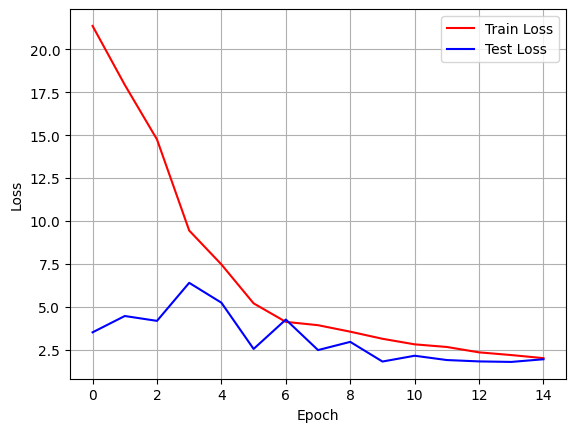

In [ ]:
fig = plt.figure()
plt.plot(train_losses, label='Train Loss', color = 'red')
plt.plot(test_losses, label='Test Loss', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

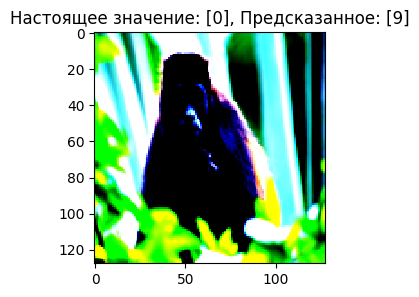

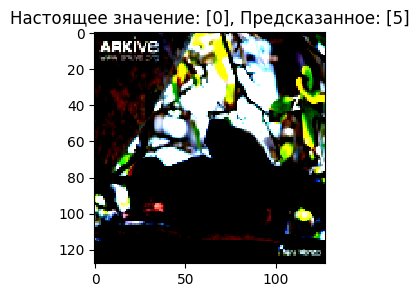

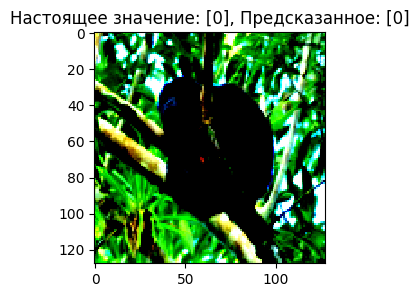

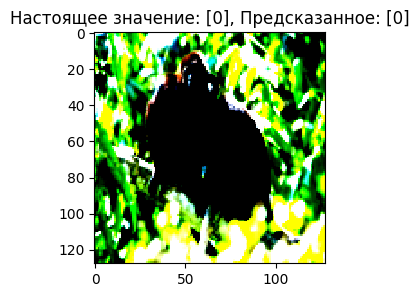

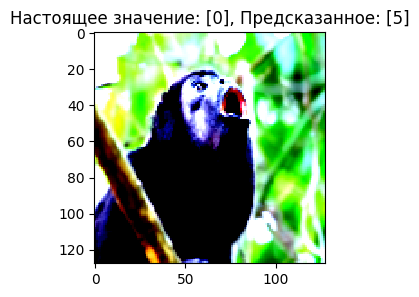

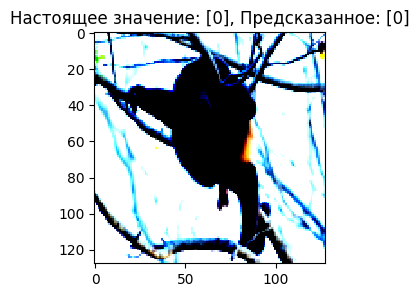

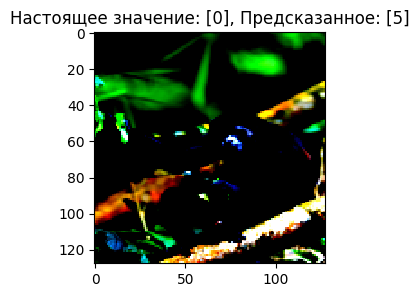

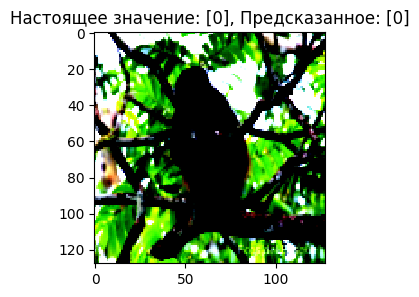

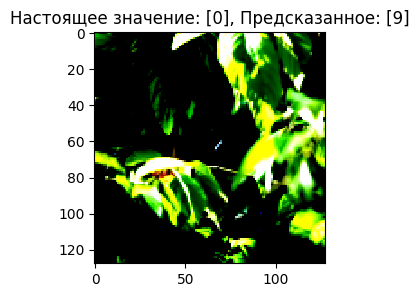

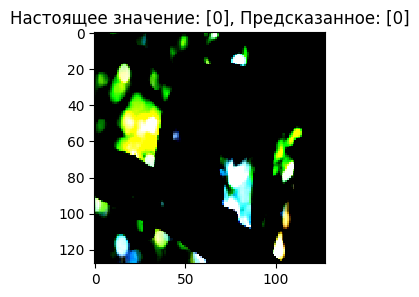

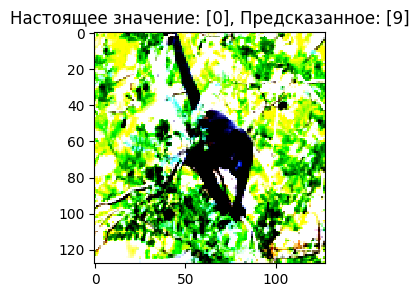

In [ ]:
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        _, predictions_indices = torch.max(outputs, 1)

        for i, (inpt, trgt, pred) in enumerate(zip(inputs, targets, predictions_indices)):
            inpt = inpt.view(3, 128, 128).cpu()
            _, ax = plt.subplots(figsize=(3,3))
            ax.set_title(f"Настоящее значение: [{trgt}], Предсказанное: [{pred}]")
            ax.imshow(inpt.permute(1, 2, 0).clamp(0,1), cmap='gray', interpolation='none')

            if i==10:
                break
        break

In [ ]:
def show_matrix():

    model.eval()

    true = torch.empty(0).to(device)
    predict = torch.empty(0).to(device)

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)

            _, predictions_indices = torch.max(outputs, 1)

            true = torch.cat((true, targets))
            predict = torch.cat((predict, predictions_indices))

    true = true.cpu()
    predict = predict.cpu()
    plt.figure(figsize=(14,12))
    sns.heatmap(
        pd.DataFrame(
            confusion_matrix(true.numpy().astype("int"), predict.numpy().astype("int")),
        ),
        annot=True,
        fmt="d"
    );


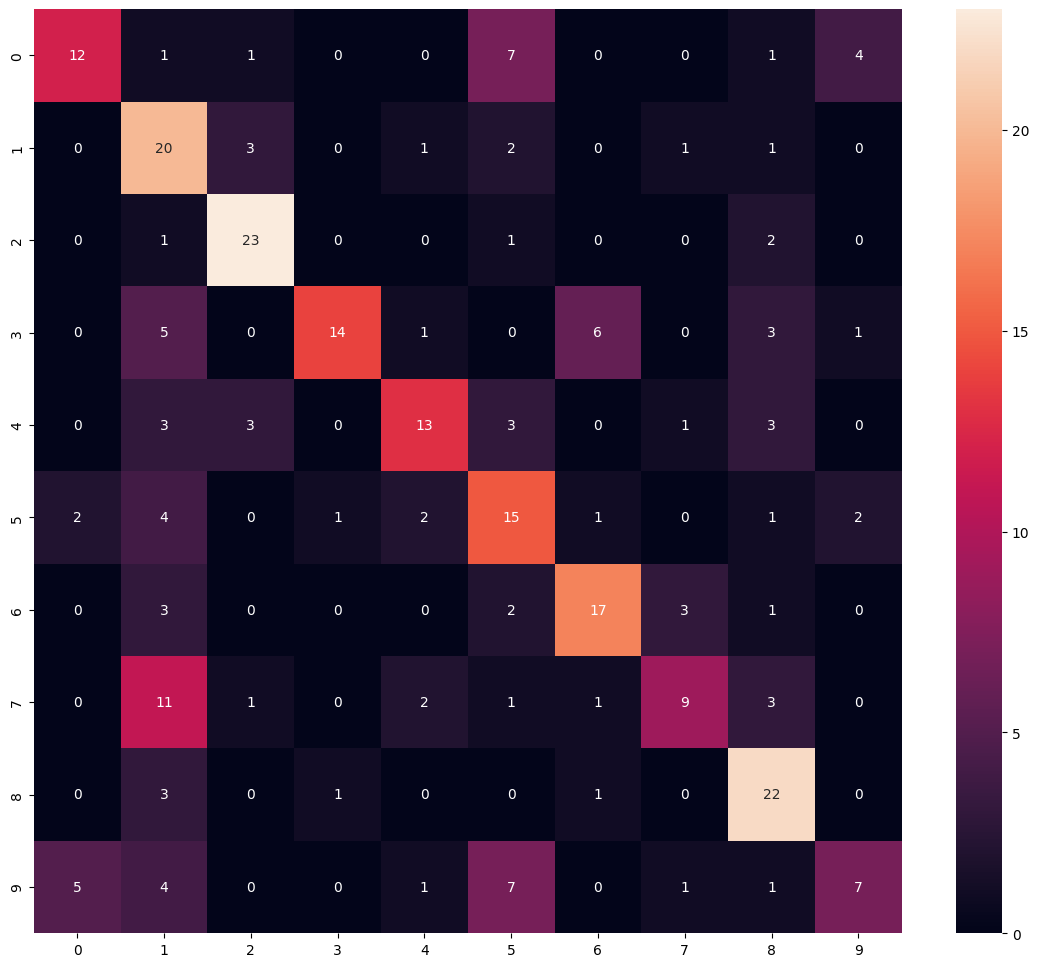

In [ ]:
show_matrix()